In [2]:
import cv2 as c #For image Manupliation
import pandas as pd
from itertools import product #For looping over an image}
import matplotlib.pyplot as plt #For |Plotting chart
import numpy as np
from sklearn.preprocessing import QuantileTransformer #Making data to Normal distribution
import scipy.stats as stat #For QQPlot
import pylab
from PIL import Image

In [134]:
def loadImage(path:str) -> tuple:
    img = c.imread(path)
    imgRgb = c.cvtColor(img, c.COLOR_BGR2RGB)
    imgArr = np.array(img)
    return (imgRgb, imgArr.shape[0], imgArr.shape[1])


In [135]:
def imgToDataList(height:int, width:int, image) -> list:
    data = []
    i = 0
    for pos in product(range(height), range(width)): #loop over the image
      #we are looping on single pixel at a time
        y = pos[0] # cordinate y
        x = pos[1] # cordinate x

        ''' Return us the Red Green Blur(RGB) value of an specific cordinate x,y'''
        R,G,B = image[y,x]

        ''' After getting the Rgb value will try to calculate the Brigthness of this Pixels'''
        brigthness = 0.299*R + 0.587*G + 0.114*B 

        to_append = [i,(y,x),(R,G,B),brigthness]
        i += 1
        data.append(to_append)
    return data

In [136]:
def loadDataFrame(data: list):
    df = pd.DataFrame(data=data,columns=["pixelNo","position","RGB","intensity"])
    return df

In [137]:
def quantiletransformDataFrame(dataFrame):
    qt = QuantileTransformer(output_distribution='normal')
    array = np.array(dataFrame["intensity"]).reshape(-1,1)
    dataFrame["quantile"] = qt.fit_transform(array)
    return dataFrame

In [214]:
PATH = "./test6.jpg"
img = loadImage(PATH)

In [215]:
imgList = imgToDataList(img[1], img[2], img[0])

In [216]:
df = loadDataFrame(imgList)

In [217]:
dfnew = quantiletransformDataFrame(df)

(array([1.0000e+00, 4.6000e+01, 9.0900e+02, 6.5980e+03, 1.7753e+04,
        1.7747e+04, 6.6150e+03, 9.0800e+02, 4.7000e+01, 1.0000e+00]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

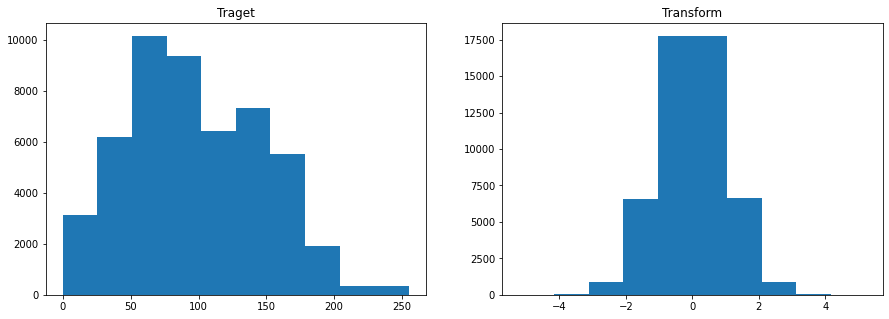

In [218]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Traget")
ax[1].set_title("Transform")

ax[0].hist(dfnew["intensity"])
ax[1].hist(dfnew["quantile"])



In [231]:
left = df["quantile"].mean() + -0.5* df["quantile"].std()
right = df["quantile"].mean() + 1* df["quantile"].std()

In [232]:
tempImg = np.zeros((img[1],img[2], 3),img[0].dtype)


for val, quan in zip(df["position"], df["quantile"]):
  x = val[1]
  y = val[0]
  # loop over all the three channel of the Image ->> Red Green Blue
  if left >= quan:
    values = [0,51,102]
    for i in range(3):
      tempImg[y,x,i] = values[i]
  if left < quan and right > quan:
    values = [51,153,255]
    for i in range(3):
      tempImg[y,x,i] = values[i]
  if right <=  quan:
    values = [204,229,255]
    for i in range(3):
      tempImg[y,x,i] = values[i]

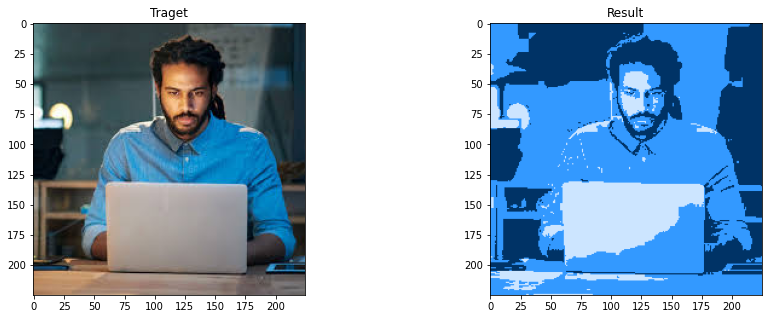

In [233]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Traget")
ax[1].set_title("Result")

ax[0].imshow(img[0])
ax[1].imshow(tempImg)

In [158]:
fig.savefig("./intensity3.png",dpi=900)